# Statistical Inference

We saw in the slides how, if we understand the sampling distribution of a statistic, we can compute a confidence itnerval. In this notebook, we'll see how to use Python to create these confidence intervals.

## Confidence Intervals

**Big Idea:** Create an interval so that C\% of the time, the parameter of interest lands within that interval (C is the confidence level - typically 95\% or 99\%).

A confidence interval lets us quantify the uncertainty associated with a point estimate. Wider interval means more uncertainty.

**General Formula for Confidence Interval:**

$$ \text{point estimate} \pm \text{margin of error} $$

$$ \text{point estimate} \pm \text{standard error of estimate} \cdot \text{critical value}$$

So we need to know the standard error of the estimate (which we can in some cases approximate via the Central Limit Theorem) and the critical value, which is tied to the desired confidence level.

Higher confidence means larger critical value and hence, wider interval.

Also, we know that the standard error the estimate shrinks as sample size increases, so we can get a narrower confidence interval by taking a larger sample.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

## Confidence Intervals for the Mean

We have seen from the slides how to create a confidence interval for the mean. In Python, we'll use the `t.interval` function from `scipy.stats`.


In [18]:
from scipy.stats import t, norm, sem

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In this example, we'll be using data from the [American Time Use Survey](https://www.bls.gov/tus/). Specifically, we'll be looking at a sample of 50 adults and the number of minutes they reported sleeping for the survey day.

In [9]:
sleeping = pd.read_csv('../data/atus_sleeping.csv')

In [10]:
sleeping.head()

,participant_id,minutes_spent_sleeping,sex
0,20181211181182,270,Male
1,20180908180663,600,Male
2,20180706181412,355,Male
3,20181009181978,405,Male
4,20180503180964,270,Male


First, let's look at the distribution of our sample values.

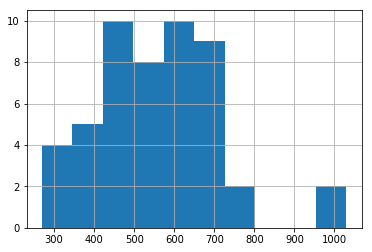

In [11]:
sleeping.minutes_spent_sleeping.hist();

In [12]:
sleeping.minutes_spent_sleeping.mean()

550.96

In [14]:
sleeping.minutes_spent_sleeping.std()

151.60070539925277

We can see that on average, people in this sample slept for 550.96 minutes (9.18 hours), but there is a lot a variability in the reported values. Let's construct our confidence interval.

For this, we need to specify 4 things:
* alpha: The confidence level
* df: The number of degrees of freedom for the $t$-distribution, equal to the the sample size - 1
* loc: The sample mean
* scale: The standard error, equal to $\frac{s}{\sqrt{n}}$ This can be calculated using the `sem` function. 

In [46]:
t.interval(alpha = 0.95, 
           df = len(sleeping.minutes_spent_sleeping) - 1, 
           loc = np.mean(sleeping.minutes_spent_sleeping), 
           scale = sem(sleeping.minutes_spent_sleeping))

(507.875556291199, 594.044443708801)

We can be 95% confident that the population mean is between 507 minutes and 594 minutes.

## Confidence Intervals for the Proportion

For this example, we've got a sample of 250 participants in the 2015 [National Health and Nutrition Examination Survey](https://www.cdc.gov/nchs/nhanes/index.htm) who were at least 18 years old.

Specifically, using this sample we would like to estimate the proportion of US adults who smoke. In this dataset, we have a column indicating whether the person smoked tobacco in the last five days, so we'll use this to make our estimate. In this column, a value of 1 indicates that the person did smoke in the last 5 days and a value of 2 indicates that they did not.

In [17]:
smoking = pd.read_csv('../data/NHANES_smoking.csv')
smoking.head()

,SEQN,age,smoked_in_last_5_days
0,89458.0,70.0,2.0
1,93352.0,40.0,2.0
2,92045.0,40.0,2.0
3,86461.0,31.0,2.0
4,84212.0,67.0,2.0


Confidence intervals for the proportion can be constructed using the `proportion_confint` function from the `statsmodels.stats.proportion` module.

In [19]:
from statsmodels.stats.proportion import proportion_confint

To use this function, we need to specify
* count: The number of "successes"
* nobs: the total number of observations
* alpha: 1 - confidence level

**Warning:** This function treats alpha differently than the confidence interval function above, where alpha corresponded to the confidence level.

To get the count, we can make use the `value_counts` method.

In [20]:
smoking.smoked_in_last_5_days.value_counts()

2.0    196
1.0     54
Name: smoked_in_last_5_days, dtype: int64

If we want to view this as a proportion, we can use the `normalize = True` argument. 

In [23]:
smoking.smoked_in_last_5_days.value_counts(normalize = True)

2.0    0.784
1.0    0.216
Name: smoked_in_last_5_days, dtype: float64

We can see that in our sample, 21.6% of respondents indicated that they had smoked in the last 5 days. This value represents our _point estimate_.

If we want to get the count of people who did smoke in the last 5 days, we can use `.loc`

In [24]:
smoking.smoked_in_last_5_days.value_counts().loc[1]

54

In [25]:
proportion_confint( count = smoking.smoked_in_last_5_days.value_counts().loc[1],
                   nobs = len(smoking),
                   alpha = 0.05
                  )

(0.16498909910493145, 0.2670109008950685)

This shows that we can be 95% confident that the true proportion of US adults who regularly smoke tobacco is between 16.5% and 26.7%.